In [13]:
import sys
sys.path.append('../..')

import time

import numpy as np
import pandas as pd

from src.data_loader import DataLoader
from src.utils import BytePairEncoder
import matplotlib.pyplot as plt
from src.pickle_loader import PickleLoader

# Byte Pair Encoding Analysis

In [14]:
en_data_loader = DataLoader('../../data/data_v2/multi30k.en.gz')
de_data_loader = DataLoader('../../data/data_v2/multi30k.de.gz')

In [15]:
with open("../../results/BPE_results.txt", "w") as file:
    file.write("Start BPE testing...\n\n")
num_operations = [1000,5000,15000]

## Learning BPE on German and English Data Individually

### English Data Set

In [16]:
vocab_sizes_en = []
fit_time_en = []
for operations in num_operations:
    encoder = BytePairEncoder()
    start_time = time.time()
    vocab = encoder.fit(en_data_loader.load_data(),operations=operations)
    end_time = time.time()
    elapsed_time = (end_time - start_time)/60
    vocab_sizes_en += [len(vocab)]
    fit_time_en += [elapsed_time]
    encoder.save_model(f'../../logs/BPE_EN_{operations}')

Processing Text: 100%|██████████| 15000/15000 [03:14<00:00, 77.03it/s, New Rule: roose@@vel@@]           


In [17]:
print(vocab_sizes_en)

[1083, 4787, 10404]


### German Data Set

In [18]:
vocab_sizes_de = []
fit_time_de = []
for operations in num_operations:
    encoder = BytePairEncoder()
    start_time = time.time()
    vocab = encoder.fit(de_data_loader.load_data(),operations=operations)
    end_time = time.time()
    elapsed_time = (end_time - start_time)/60
    vocab_sizes_de += [len(vocab)]
    fit_time_de += [elapsed_time]
    encoder.save_model(f'../../logs/BPE_DE_{operations}')

Processing Text: 100%|██████████| 15000/15000 [08:02<00:00, 31.09it/s, New Rule: nasenkle@@mmen]                


## Learning BPE on German and English Data Combined

In [19]:
vocab_sizes_merged = []
fit_time_merged = []
merged_text = en_data_loader.load_data() + '\n' + de_data_loader.load_data()
for operations in num_operations:
    encoder = BytePairEncoder()
    start_time = time.time()
    vocab = encoder.fit(merged_text,operations=operations)
    end_time = time.time()
    elapsed_time = (end_time - start_time)/60
    vocab_sizes_merged += [len(vocab)]
    fit_time_merged += [elapsed_time]
    encoder.save_model(f'../../logs/BPE_JOINT_{operations}')

Processing Text: 100%|██████████| 15000/15000 [11:59<00:00, 20.84it/s, New Rule: stan@@ts]                 


## 7k Operations for First model

In [25]:
# English BPE
en_encoder = BytePairEncoder()
en_encoder.fit(en_data_loader.load_data(), operations=7000)
en_encoder.save_model(f'../../logs/BPE_EN_{7000}')

# German BPE
de_encoder = BytePairEncoder()
de_encoder.fit(de_data_loader.load_data(), operations=7000)
de_encoder.save_model(f'../../logs/BPE_DE_{7000}')

# Joint BPE
merged_text = en_data_loader.load_data() + '\n' + de_data_loader.load_data()
joint_encoder = BytePairEncoder()
joint_encoder.fit(merged_text, operations=7000)
joint_encoder.save_model(f'../../logs/BPE_JOINT_{7000}')

Processing Text: 100%|██████████| 7000/7000 [07:06<00:00, 16.42it/s, New Rule: h@@art]                 


'../../logs/BPE_JOINT_7000.pickle'

# Quantiative Analysis

In [20]:
data = {'German Vocab Size' : vocab_sizes_de, 'English Vocab Size' : vocab_sizes_en, 'Merged Vocab Size' : vocab_sizes_merged, 'Operations' : num_operations}
df = pd.DataFrame(data)
df = df.set_index('Operations')
df = df.style.highlight_max(axis = 1, color='yellow')
print("Comparison of total number of operations to vocabulary size:")
df

Comparison of total number of operations to vocabulary size:


,German Vocab Size,English Vocab Size,Merged Vocab Size
Operations,,,
1000,1111,1083,1108
5000,4970,4787,5030
15000,13321,10404,14092


In [21]:
data = {'Time on German (min)' : fit_time_de, 'Time on English (min)' : fit_time_en, 'Time on Merged (min)' : fit_time_merged, 'Operations' : num_operations}
df = pd.DataFrame(data)
df = df.set_index('Operations')
df = df.style.highlight_max(axis = 1, color='yellow')
print("Comparison of total number of operations to learning time:")
df

Comparison of total number of operations to learning time:


,Time on German (min),Time on English (min),Time on Merged (min)
Operations,,,
1000,0.832160,0.370051,1.220438
5000,3.398910,1.491305,4.980563
15000,8.043519,3.248100,12.007882


## Visualization

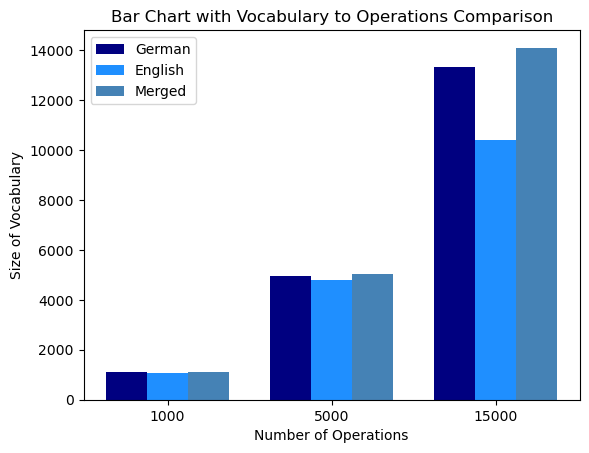

In [22]:
# plot the data
x = np.array([0, 1, 2])
bar_width = 0.25
fig, ax = plt.subplots()
ax.bar(x - bar_width, vocab_sizes_de, width=bar_width, label='German', color=(0.0, 0.0, 0.5))
ax.bar(x, vocab_sizes_en, width=bar_width, label='English', color=(0.12, 0.56, 1.0))
ax.bar(x + bar_width, vocab_sizes_merged, width=bar_width, label='Merged', color=(0.27, 0.51, 0.71))

# set labels and title
ax.set_ylabel('Size of Vocabulary')
ax.set_xlabel('Number of Operations')
ax.set_title('Bar Chart with Vocabulary to Operations Comparison')
ax.set_xticks(x)
ax.set_xticklabels(num_operations)
ax.legend()

plt.show()

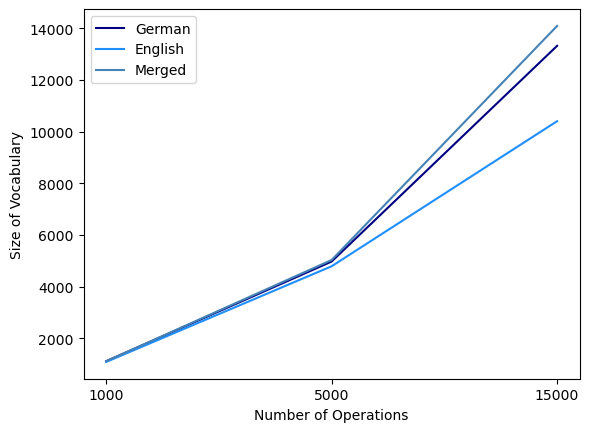

In [23]:
# Create a figure and axis object
fig, ax = plt.subplots()

x = np.array([1, 2, 3])
# Plot the curves
ax.plot(x, vocab_sizes_de, label='German',color=(0.0, 0.0, 0.5))
ax.plot(x, vocab_sizes_en, label='English',color=(0.12, 0.56, 1.0))
ax.plot(x, vocab_sizes_merged, label='Merged',color=(0.27, 0.51, 0.71))
# Add a legend
ax.legend()

ax.set_ylabel('Size of Vocabulary')
ax.set_xlabel('Number of Operations')

ax.set_xticks(x)
ax.set_xticklabels(num_operations)

# Show the plot
plt.show()

# Qualitative Analysis

Whilst the BPE algorithm stopped to learn more words, the vocabulary learned on the German dataset grew even more. One possible reason could be the amount of long and combined words, which can be build in the German language. One example would be "Antriebsradsystem".

There are also some differences between the vocabulary learned on German data compared to Vocabulary learned on the merged data. For example: "antr@@ ie@@ b@@ s@@ rads@@ y@@ ste@@ m" and "an@@ trie@@ b@@ s@@ rads@@ yste@@ m "

In [24]:
with open("../results/BPE_results.txt", "r") as file:
    print(file.read())

FileNotFoundError: [Errno 2] No such file or directory: '../results/BPE_results.txt'